In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install seaborn

In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
df=pd.read_csv('Data_Sets/CarPriceDataset.csv')

In [6]:
df.head()

,ID,Company,Model,Type,Fuel,Transmission,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,Maruti,Alto,Hatchback,Petrol,Manual,796,19.7,45000,2,32,2010,1.2
1,2,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2011,3.0
2,3,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2018,4.0
3,4,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,28000,2,73,2012,5.1
4,5,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,40000,2,73,2012,4.0


In [7]:
df.shape

(150, 13)

In [8]:
df.describe()

,ID,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
count,150.000000,150.000000,147.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,2573.346667,15.870748,36673.753333,2.320000,222.046667,2015.553333,62.030733
std,43.445368,1687.191300,6.884811,19426.665542,0.698224,209.008312,3.398651,98.571347
min,1.000000,0.000000,3.800000,3600.000000,2.000000,27.000000,2005.000000,0.800000
25%,38.250000,1462.000000,10.430000,23721.500000,2.000000,74.000000,2014.000000,4.765000
50%,75.500000,1997.000000,15.000000,36000.000000,2.000000,131.000000,2016.000000,19.980000
75%,112.750000,2998.000000,20.170000,45647.250000,2.000000,314.000000,2018.000000,80.000000
max,150.000000,6749.000000,47.450000,130000.000000,5.000000,985.000000,2021.000000,605.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               150 non-null    int64  
 1   Company          150 non-null    object 
 2   Model            150 non-null    object 
 3   Type             150 non-null    object 
 4   Fuel             150 non-null    object 
 5   Transmission     150 non-null    object 
 6   Engine           150 non-null    int64  
 7   Mileage          147 non-null    float64
 8   Kms_driven       150 non-null    int64  
 9   Buyers           150 non-null    int64  
 10  Horsepower (kw)  150 non-null    int64  
 11  Year             150 non-null    int64  
 12  Price (Lakhs)    150 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 15.4+ KB


## Data Preprocessing

In [10]:
df.isnull().sum()

ID                 0
Company            0
Model              0
Type               0
Fuel               0
Transmission       0
Engine             0
Mileage            3
Kms_driven         0
Buyers             0
Horsepower (kw)    0
Year               0
Price (Lakhs)      0
dtype: int64

In [11]:
import numpy as np
x=np.array([5,10,12,7,15,3000])
np.median(x)

np.float64(11.0)

In [12]:
numerical_columns=df.select_dtypes(include=['number','int','float']).columns

In [13]:
df[numerical_columns].head()

,ID,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,796,19.7,45000,2,32,2010,1.2
1,2,998,20.5,40005,2,46,2011,3.0
2,3,998,20.5,40005,2,46,2018,4.0
3,4,1462,18.5,28000,2,73,2012,5.1
4,5,1462,18.5,40000,2,73,2012,4.0


In [14]:
catogerical_columns=df.select_dtypes(include=['object','category']).columns

In [15]:
df[catogerical_columns].head()

,Company,Model,Type,Fuel,Transmission
0,Maruti,Alto,Hatchback,Petrol,Manual
1,Maruti,Wagon R,Hatchback,Petrol,Manual
2,Maruti,Wagon R,Hatchback,Petrol,Manual
3,Maruti,Ertiga,MUV,Petrol,Automatic
4,Maruti,Ertiga,MUV,Petrol,Automatic


/tmp/ipykernel_1932/2078059552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable',y='value',data=df_melt,palette='pastel')


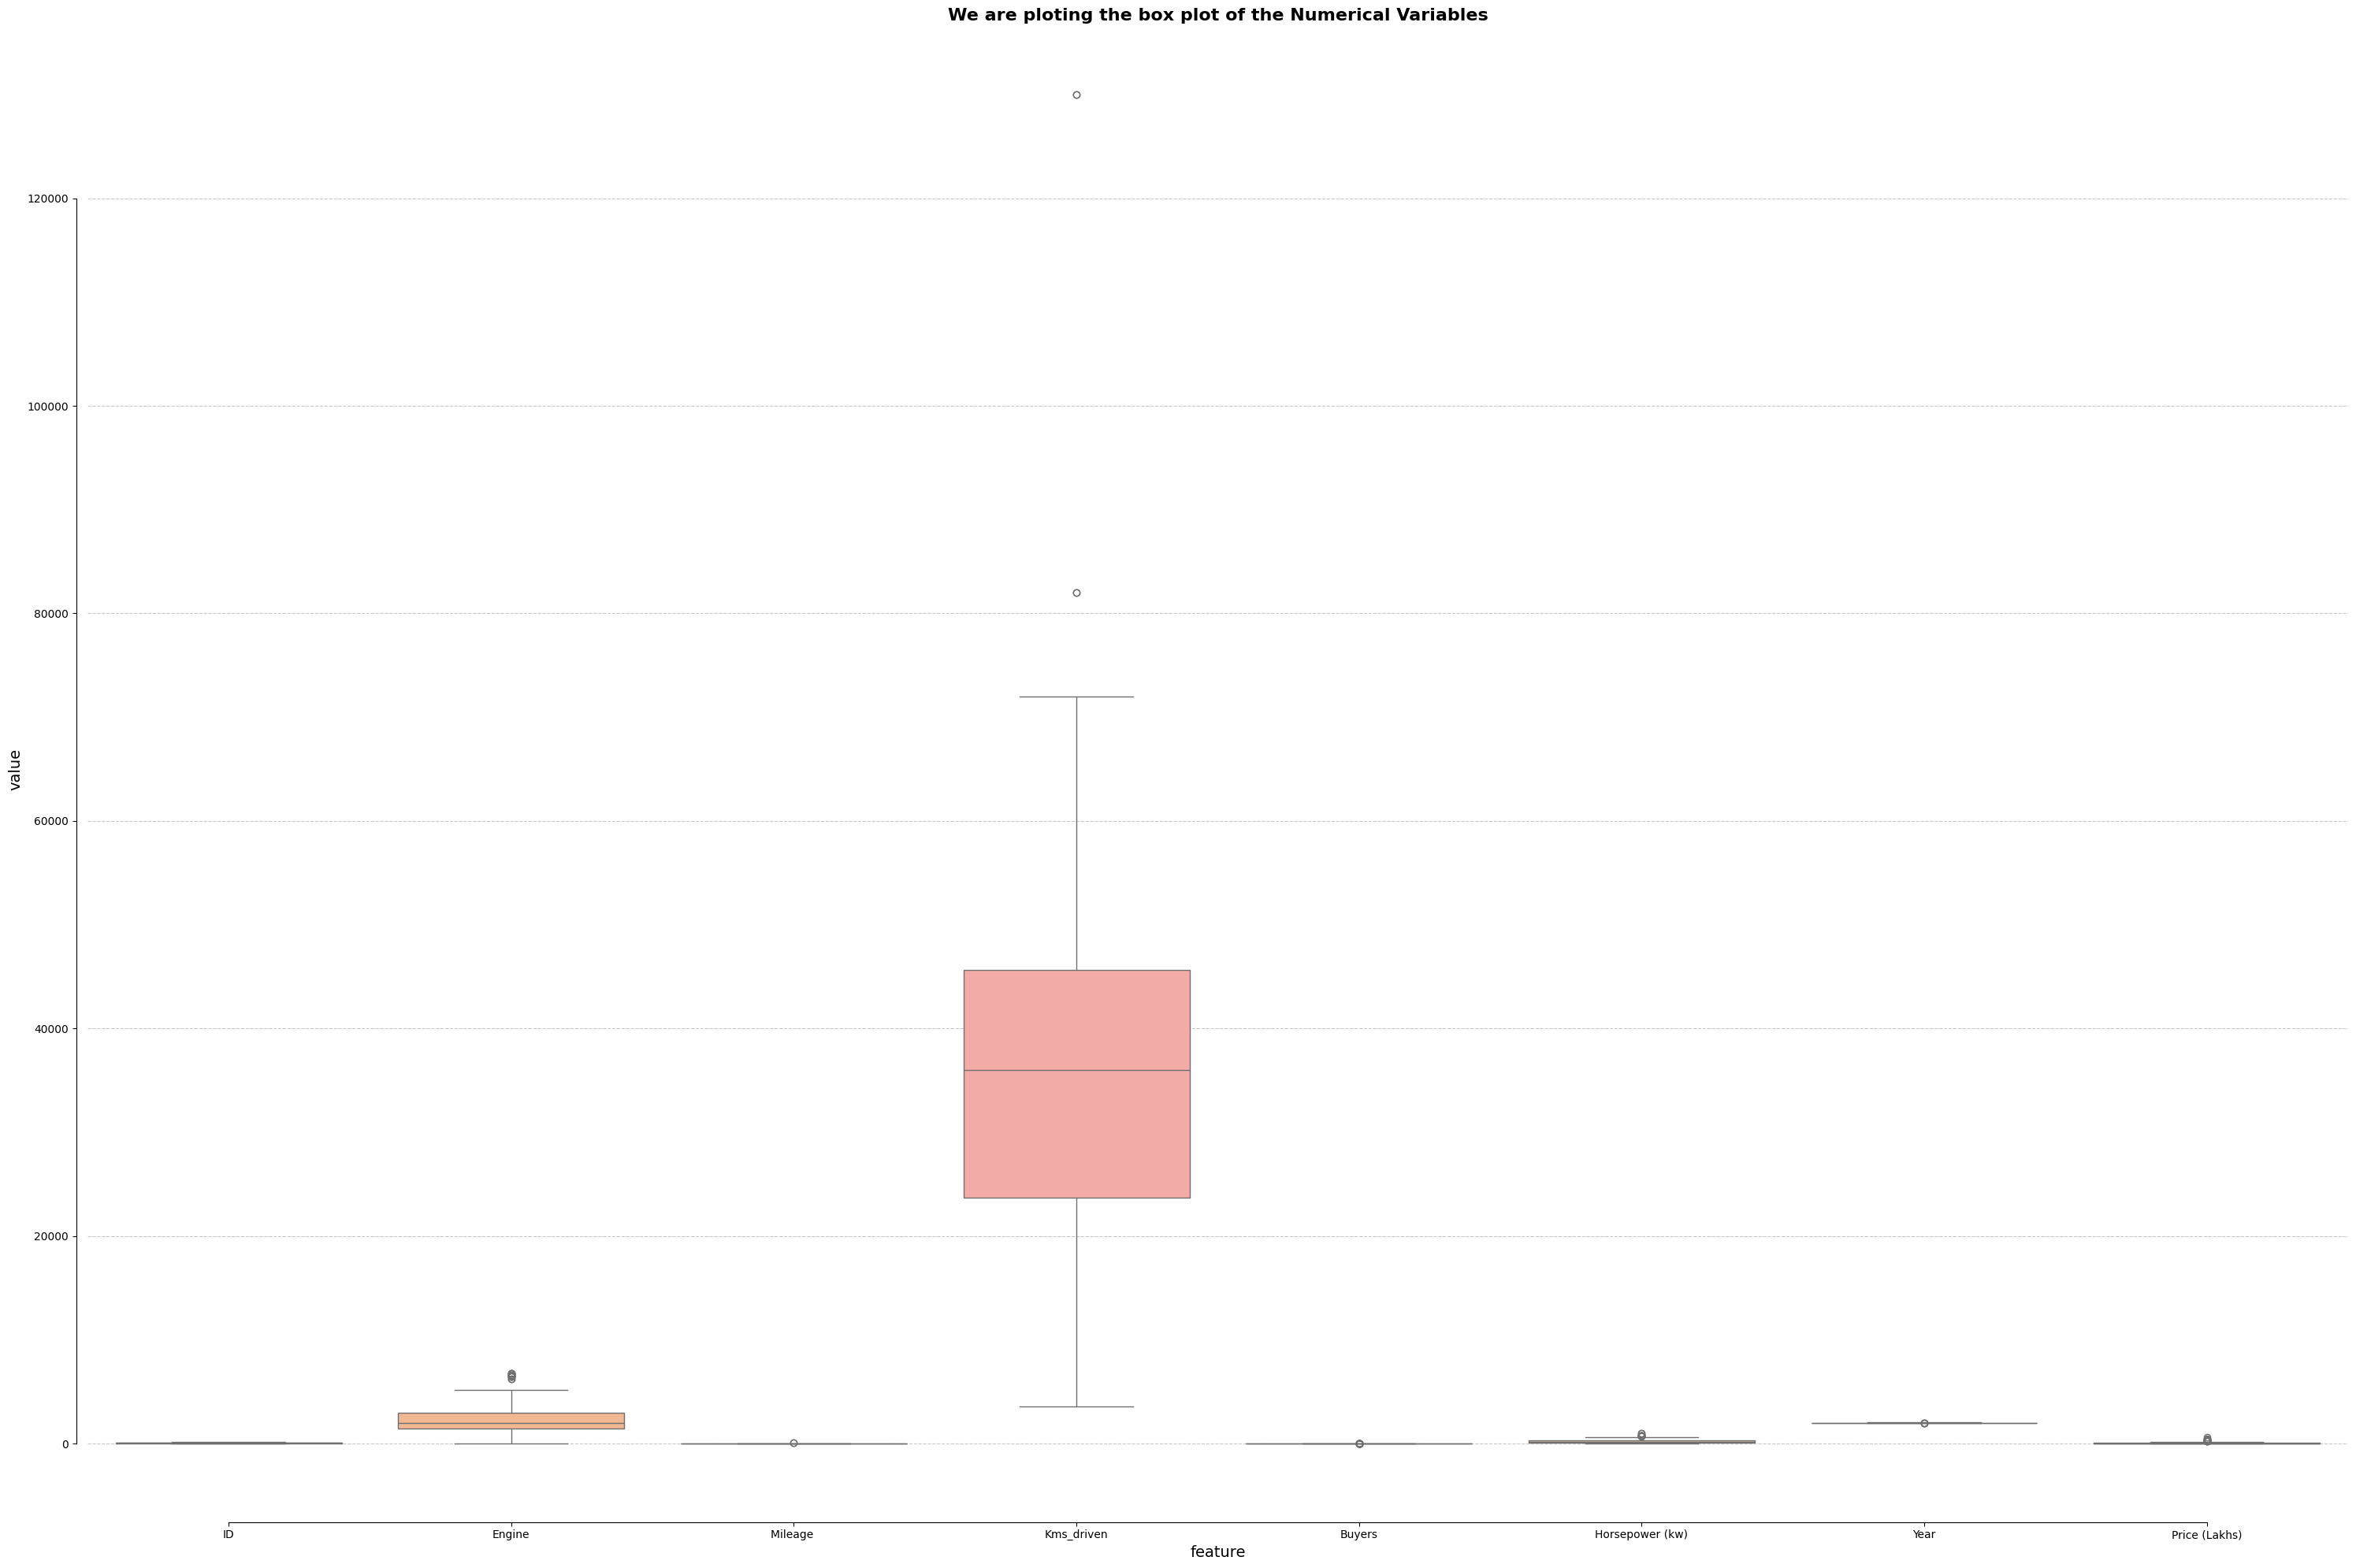

In [16]:
df_melt=df.melt(value_vars=numerical_columns)
plt.figure(figsize=(30,20))
sns.boxplot(x='variable',y='value',data=df_melt,palette='pastel')
plt.title('We are ploting the box plot of the Numerical Variables',fontsize=16,weight='bold')
plt.xlabel('feature',fontsize=14)
plt.ylabel('value',fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
sns.despine(offset=10,trim=True)
plt.tight_layout()
plt.show() 

In [17]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].mean())

In [18]:
df.isnull().sum()

ID                 0
Company            0
Model              0
Type               0
Fuel               0
Transmission       0
Engine             0
Mileage            0
Kms_driven         0
Buyers             0
Horsepower (kw)    0
Year               0
Price (Lakhs)      0
dtype: int64

In [19]:
df.head()

,ID,Company,Model,Type,Fuel,Transmission,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,Maruti,Alto,Hatchback,Petrol,Manual,796,19.7,45000,2,32,2010,1.2
1,2,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2011,3.0
2,3,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2018,4.0
3,4,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,28000,2,73,2012,5.1
4,5,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,40000,2,73,2012,4.0


In [20]:
df[catogerical_columns].head()

,Company,Model,Type,Fuel,Transmission
0,Maruti,Alto,Hatchback,Petrol,Manual
1,Maruti,Wagon R,Hatchback,Petrol,Manual
2,Maruti,Wagon R,Hatchback,Petrol,Manual
3,Maruti,Ertiga,MUV,Petrol,Automatic
4,Maruti,Ertiga,MUV,Petrol,Automatic


In [21]:
catogerical_columns=df.select_dtypes(include=['object','category']).columns.tolist()
catogerical_columns

['Company', 'Model', 'Type', 'Fuel', 'Transmission']

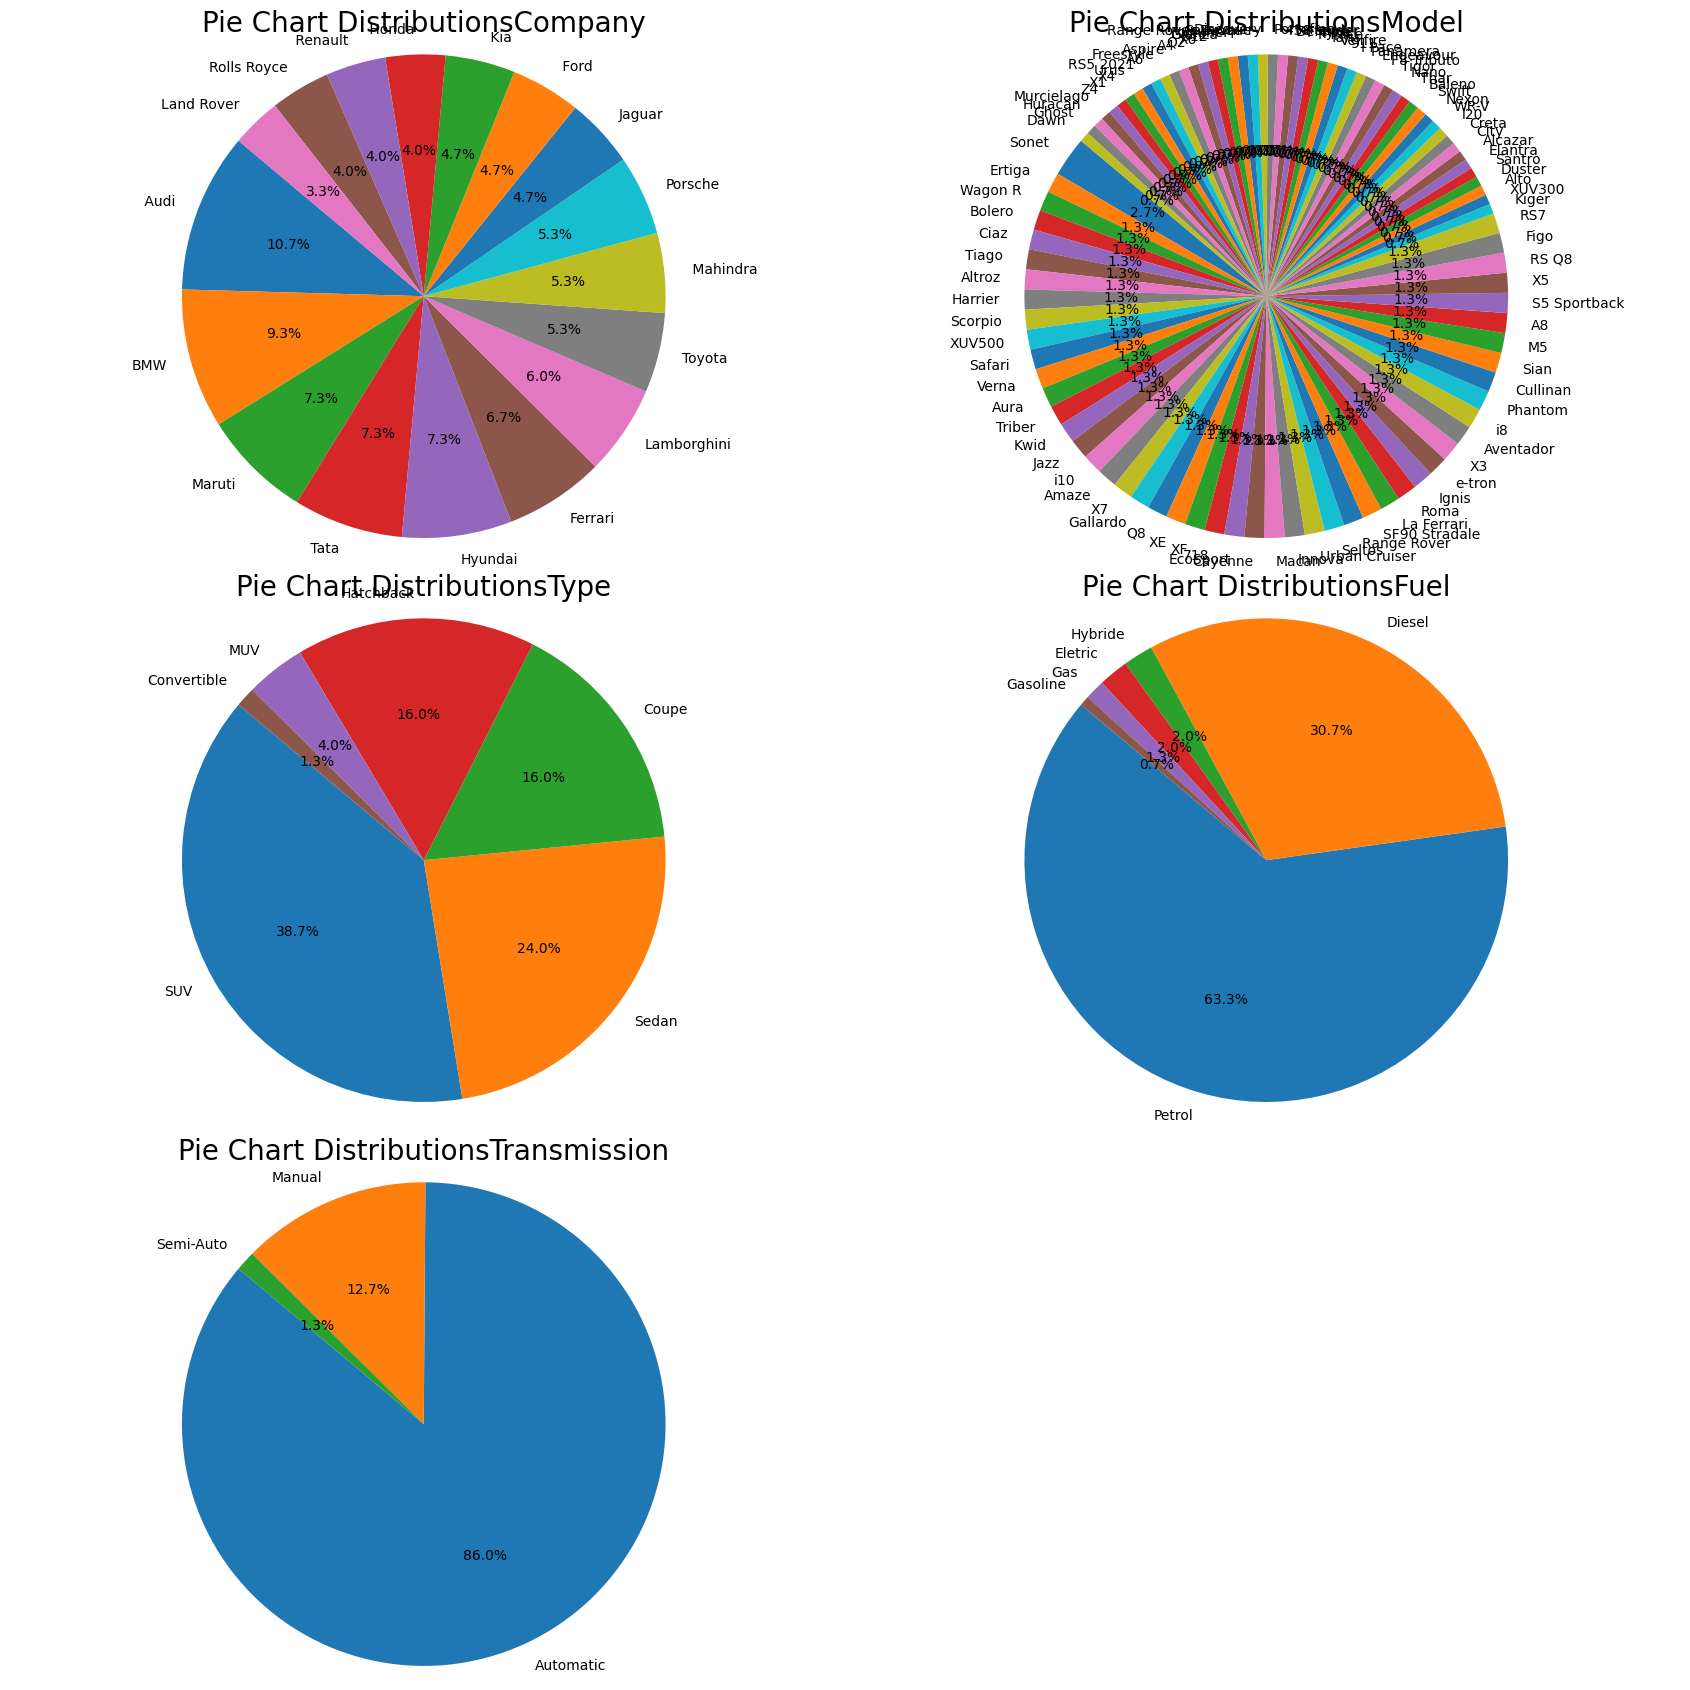

In [22]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(17,17))
axes=axes.flatten()

for i,col in enumerate(catogerical_columns):
    value_counts=df[col].value_counts()
    axes[i].pie(value_counts,labels=value_counts.index,autopct='%1.1f%%',startangle=140)
    axes[i].set_title(f'Pie Chart Distributions{col}',fontsize=20)
    axes[i].axis('equal')

for j in range(len(catogerical_columns),len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()        

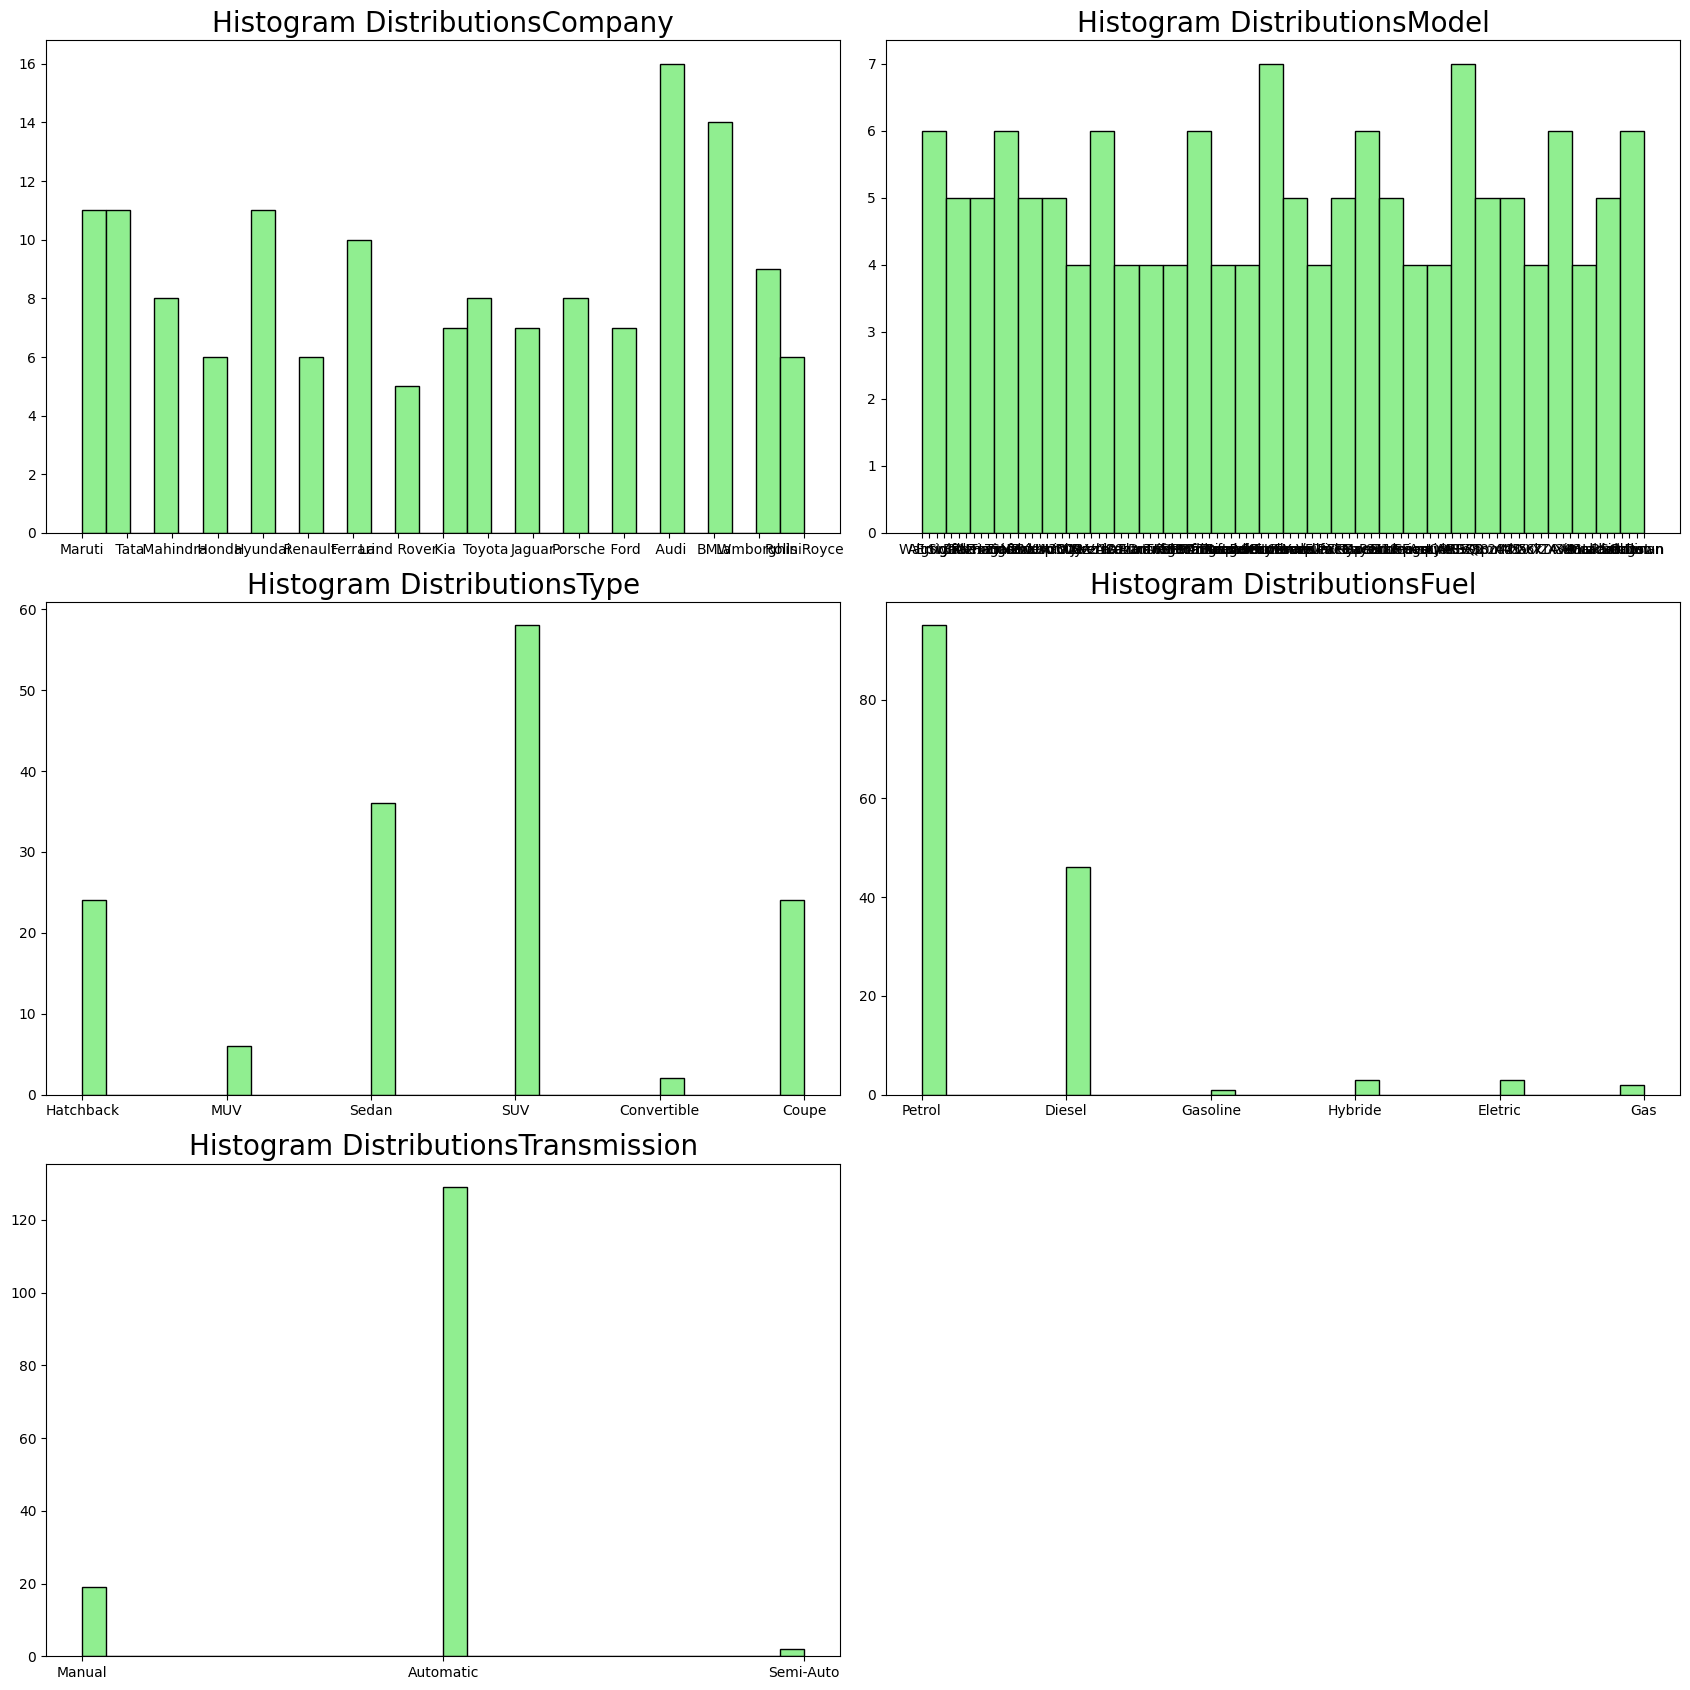

In [23]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(17,17))
axes=axes.flatten()

for i,col in enumerate(catogerical_columns):
    axes[i].hist(df[col],bins=30,edgecolor='black',color='lightgreen')
    axes[i].set_title(f'Histogram Distributions{col}',fontsize=20)

for j in range(len(catogerical_columns),len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()  

In [24]:
df.head(2)

,ID,Company,Model,Type,Fuel,Transmission,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,Maruti,Alto,Hatchback,Petrol,Manual,796,19.7,45000,2,32,2010,1.2
1,2,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2011,3.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               150 non-null    int64  
 1   Company          150 non-null    object 
 2   Model            150 non-null    object 
 3   Type             150 non-null    object 
 4   Fuel             150 non-null    object 
 5   Transmission     150 non-null    object 
 6   Engine           150 non-null    int64  
 7   Mileage          150 non-null    float64
 8   Kms_driven       150 non-null    int64  
 9   Buyers           150 non-null    int64  
 10  Horsepower (kw)  150 non-null    int64  
 11  Year             150 non-null    int64  
 12  Price (Lakhs)    150 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 15.4+ KB


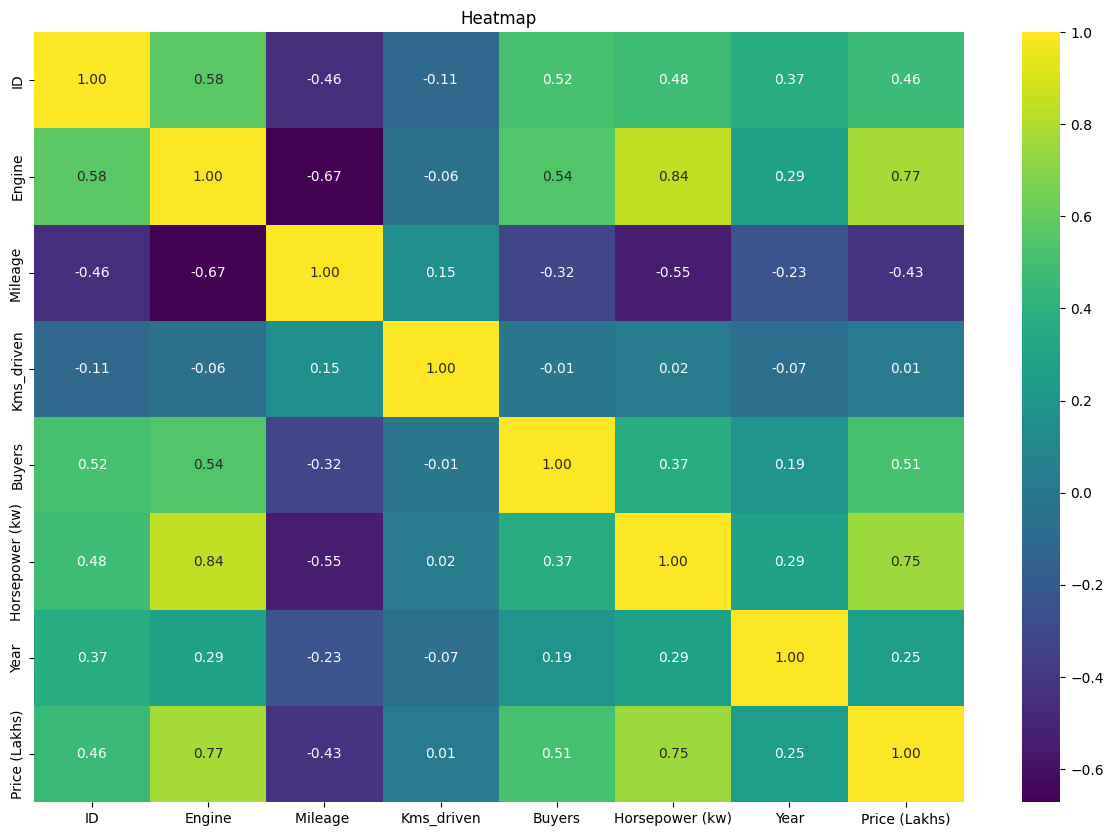

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis',fmt='.2f')
plt.title('Heatmap')
plt.show()

In [27]:
df[catogerical_columns].head()

,Company,Model,Type,Fuel,Transmission
0,Maruti,Alto,Hatchback,Petrol,Manual
1,Maruti,Wagon R,Hatchback,Petrol,Manual
2,Maruti,Wagon R,Hatchback,Petrol,Manual
3,Maruti,Ertiga,MUV,Petrol,Automatic
4,Maruti,Ertiga,MUV,Petrol,Automatic


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #LabelEncoder/One Hot 
for col in catogerical_columns:
    df[col]=le.fit_transform(df[col])


In [29]:
df[catogerical_columns].head()

,Company,Model,Type,Fuel,Transmission
0,13,8,2,5,1
1,13,82,2,5,1
2,13,82,2,5,1
3,13,29,3,5,0
4,13,29,3,5,0


In [30]:
df[numerical_columns].head()

,ID,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,796,19.7,45000,2,32,2010,1.2
1,2,998,20.5,40005,2,46,2011,3.0
2,3,998,20.5,40005,2,46,2018,4.0
3,4,1462,18.5,28000,2,73,2012,5.1
4,5,1462,18.5,40000,2,73,2012,4.0


In [31]:
df[numerical_columns].head()

,ID,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,796,19.7,45000,2,32,2010,1.2
1,2,998,20.5,40005,2,46,2011,3.0
2,3,998,20.5,40005,2,46,2018,4.0
3,4,1462,18.5,28000,2,73,2012,5.1
4,5,1462,18.5,40000,2,73,2012,4.0


In [32]:
df['Engine'].mean()

np.float64(2573.346666666667)

In [33]:
df['Engine'].std()

np.float64(1687.191300073144)

In [34]:
(796-2573.346666666667)/1687.191300073144


-1.0534351774986122

In [35]:
(998-2573.346666666667)/1687.191300073144

-0.933709571995998

In [36]:
(1462-2573.346666666667)/1687.191300073144

-0.6586962999503893

In [37]:
df.head()

,ID,Company,Model,Type,Fuel,Transmission,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,13,8,2,5,1,796,19.7,45000,2,32,2010,1.2
1,2,13,82,2,5,1,998,20.5,40005,2,46,2011,3.0
2,3,13,82,2,5,1,998,20.5,40005,2,46,2018,4.0
3,4,13,29,3,5,0,1462,18.5,28000,2,73,2012,5.1
4,5,13,29,3,5,0,1462,18.5,40000,2,73,2012,4.0


In [38]:
#Alogrithm list
#1.Linear Regration with ... etc
#2.Logistic Regration 
#3.Decision Tree
#4.Random Forest classifier
#5.K N N
#6.K Means Clustring
#7.Support Vector Machine
#8.P C A
#9.Naive Baye's Classifier

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

In [40]:
df.head()

,ID,Company,Model,Type,Fuel,Transmission,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,-1.720542,13,8,2,5,1,-1.056964,0.563756,0.430035,-0.459841,-0.912324,-1.639456,-0.619191
1,-1.697448,13,82,2,5,1,-0.936838,0.681535,0.172053,-0.459841,-0.845117,-1.344236,-0.600869
2,-1.674353,13,82,2,5,1,-0.936838,0.681535,0.172053,-0.459841,-0.845117,0.722305,-0.590690
3,-1.651258,13,29,3,5,0,-0.660903,0.387088,-0.447983,-0.459841,-0.715503,-1.049015,-0.579494
4,-1.628164,13,29,3,5,0,-0.660903,0.387088,0.171794,-0.459841,-0.715503,-1.049015,-0.590690


In [43]:
from sklearn.linear_model import LinearRegression
import os 


In [41]:
!pip install py3Dmol

In [42]:
import py3Dmol
import requests

# Fetch the PDB file for 4JIR
pdb_id = '4JIR'
url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
response = requests.get(url)
pdb_data = response.text

# Create a 3Dmol view
view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, 'pdb')
view.setStyle({'cartoon': {'color': 'spectrum'}})

# Highlight the epalrestat ligand (residue name 'EPR')
view.addStyle({'resn': 'EPR'}, {'stick': {'colorscheme': 'yellowCarbon'}})

# Adjust the view and display
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [44]:
X=df.drop('Price (Lakhs)',axis=1)
y=df['Price (Lakhs)']


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((120, 12), (120,), (30, 12), (30,))

In [51]:
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [53]:
print(mse)
print(r2)

0.3138070890599509
-0.471445189470697


In [54]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

0.541778638847219
-1.5404065098651194
